<a href="https://colab.research.google.com/github/christophercallaghan2022/MSDS422/blob/main/Copy_of_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment

Use three binary explanatory variables relating to client banking history: default, housing, and loan. Predict the binary response variable: Has the client subscribed to a term deposit? Use all banking client observations with complete data for these study variables. Employ two classification methods: (1) logistic regression as described in Chapter 4 of the Géron (2017) textbook and (2) naïve Bayes classification. Evaluate these methods within a cross-validation design, using the area under the receiver operating characteristic (ROC) curve as an index of classification performance. Python scikit-learn should be your primary environment for conducting this research.

Regarding the management problem, imagine that you are advising the bank about machine learning methods to guide telephone marketing campaigns. Which of the two modeling methods would you recommend and why? And, given the results of your research, which group of banking clients appears to be the best target for direct marketing efforts (similar to those used with previous telephone campaigns)? 

#Data Dictionary



* Age: Age in years
* Job: type of job
* Marital: marital status
* Education: level of education
---
* Default: has credit in default? (y/n)
* Balance: average yearly balance
* Housing: has housing load? (y/n)
* Loan: has personal loan? (y/n)
---
* Contact: communication type
* Day: last contact day of the month
* Month: las contact month of the year
* Duration: last contact duraction
---
* Campaign: number of contact performed during this campaign for this client
* Pdays: number of days that passed since the client was last contacted from a previous campaign
* Previous: number of contacts performed before this campaign for this client
* Poutcome: outcome of the previous marketing campaign
---
* Response: has the client subscribed to a term deposit? (y/n)



#Data Preperation

In [1]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#S3 Establish working directory
import os # Operation System
os.getcwd()
%cd /content/gdrive/My Drive/MSDS_422/Assignment_3
!pwd
!ls
print('Working Directory')
print(os.getcwd())
work_dir = "/content/gdrive/My Drive/MSDS_422/Assignment_3"

/content/gdrive/My Drive/MSDS_422/Assignment_3
/content/gdrive/My Drive/MSDS_422/Assignment_3
bank.csv  cv-results.txt  Log_ROC.png  plot-corr-map.pdf
Working Directory
/content/gdrive/My Drive/MSDS_422/Assignment_3


In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [4]:
###Loading Packages###
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import base packages into the namespace for this program
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from pandas.plotting import scatter_matrix

In [5]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

In [6]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [7]:
# initial work with the data set
bank = pd.read_csv(work_dir+'/bank.csv', sep = ';')

# print first few rows of df 
bank.head()
bank.info()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  response   4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
# examine the shape of original input data
print(bank.shape)

(4521, 17)


In [9]:
# # drop observations with missing data, if any
bank.dropna()

# examine the shape of original input data
bank.shape

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


(4521, 17)

In [10]:
# look at the list of column names, note that y is the response
list(bank.columns.values)

# look at the beginning of the DataFrame
bank.head()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
# Descriptive Statistics for non-categorical variables
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


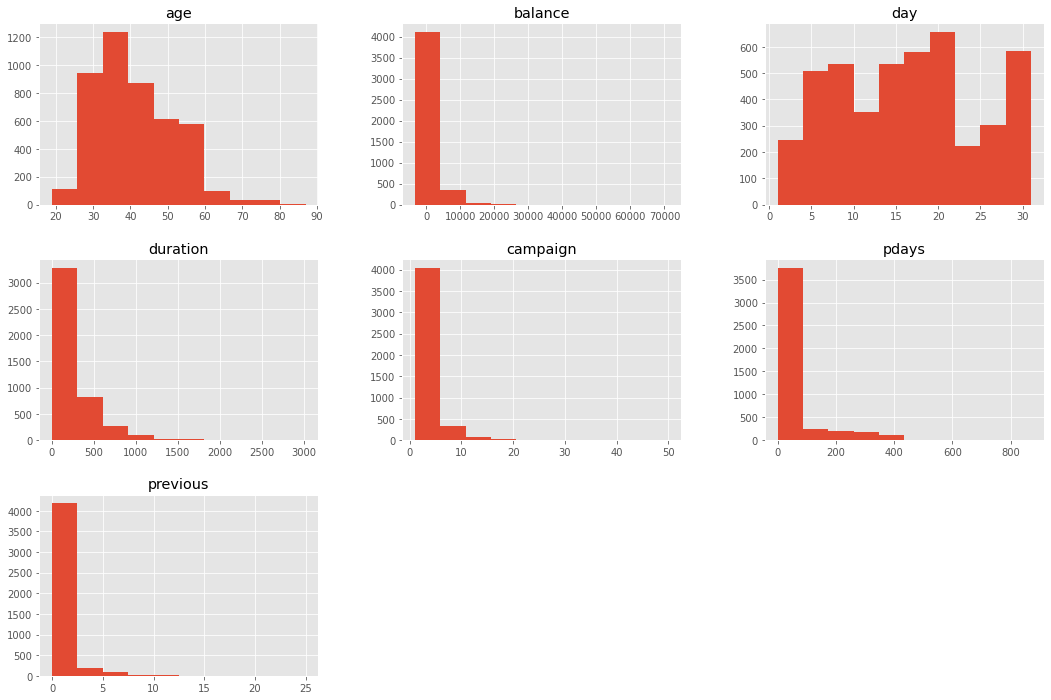

In [12]:
# Check distributions of non-categorical variables
bank.hist(figsize=(18,12));

In [13]:
bank['response'].value_counts()

no     4000
yes     521
Name: response, dtype: int64

<Figure size 432x288 with 0 Axes>

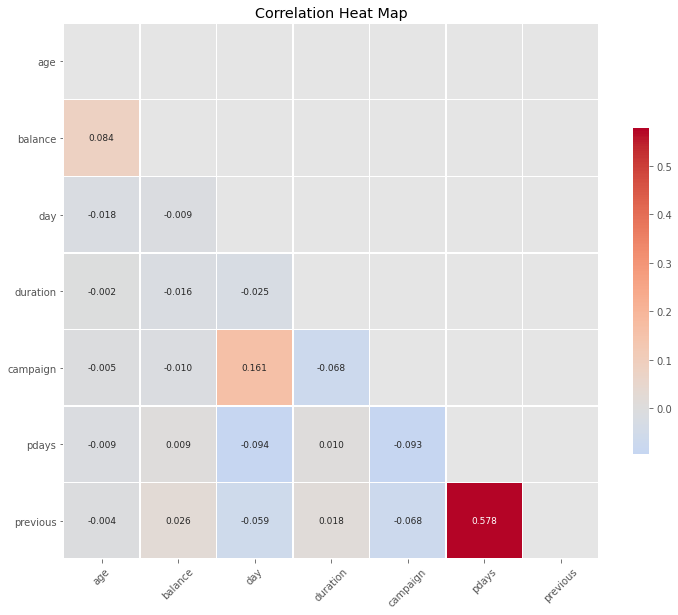

In [14]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

# examine correlations
corr_chart(df_corr = bank) 

In [15]:
bank = pd.get_dummies(bank, columns=['job','marital','education','default','housing','loan','contact','month','poutcome','response'])

In [16]:
bank.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,response_no,response_yes
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,35,1350,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,30,1476,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,59,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


In [17]:
X = bank.drop(['response_no','response_yes'], axis=1)
y = bank.response_yes

In [18]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

#Classification Models

In [27]:
# cross-validation scoring code adapted from Scikit Learn documentation
from sklearn.metrics import roc_auc_score

# specify the set of classifiers being evaluated
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

AUC: 0.8960874198282969


<Figure size 720x576 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'FP Rate')

Text(0, 0.5, 'TP Rate')

Text(0.5, 1.0, 'ROC Curve')

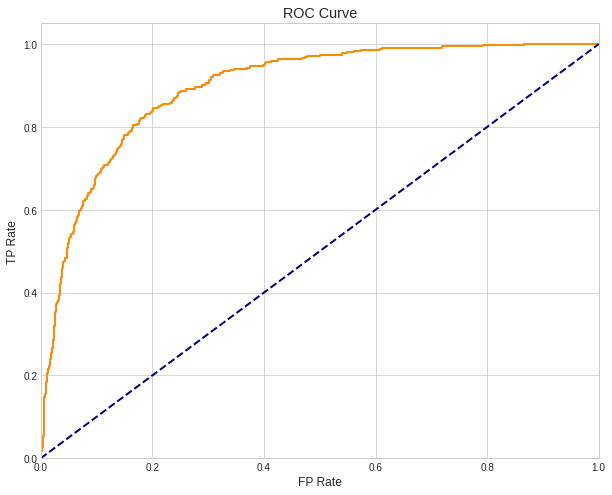

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.style.use('seaborn-whitegrid')
logreg = LogisticRegression(fit_intercept=False, n_jobs=-1)

#Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_train)
y_pred = logreg.fit(X_train, y_train).predict(X_test)

#False positive Rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_train, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')
plt.show()

AUC: 0.7700020127811603


<Figure size 720x576 with 0 Axes>

Text(0.5, 0, 'FP Rate')

Text(0, 0.5, 'TP Rate')

Text(0.5, 1.0, 'ROC Curve')

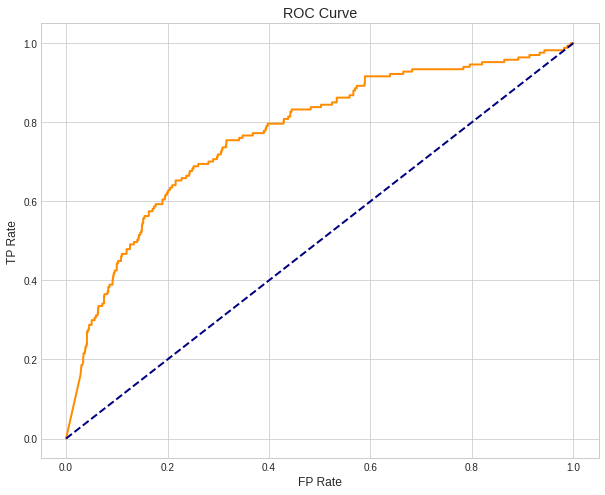

In [29]:
gaussiannb= GaussianNB()

y_score = gaussiannb.fit(X_train, y_train).predict_proba(X_test)
y_preds = y_score[:,1]

fprnb, tprnb, thresholdnb = roc_curve(y_test, y_preds)
roc_auc_nb = auc(fprnb, tprnb)

print('AUC: {}'.format(auc(fprnb, tprnb)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fprnb, tprnb, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')

### Bank Marketing Study:


Imagine that you are advising the bank about machine learning methods to guide telephone marketing campaigns: 
- Which of the two modeling methods would you recommend and why? 
- And, given the results of your research, which group of banking clients appears to be the best target for direct marketing 
  efforts (similar to those used with previous telephone campaigns)? 

REPORT/FINDINGS: 

(1) A summary and problem definition for management; 


---
(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed; 


---
(3) Overview of programming work; 


---
(4) Review of results with recommendations for management.